## 1- import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## 2- Reading the data

In [2]:
data = pd.read_csv(r"/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")

## 3- Data analysis

In [3]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
data.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [5]:
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [7]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [8]:
data.drop_duplicates()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


## 4- Data visualization

In [9]:
# Create a DataFrame
df = pd.DataFrame(data)

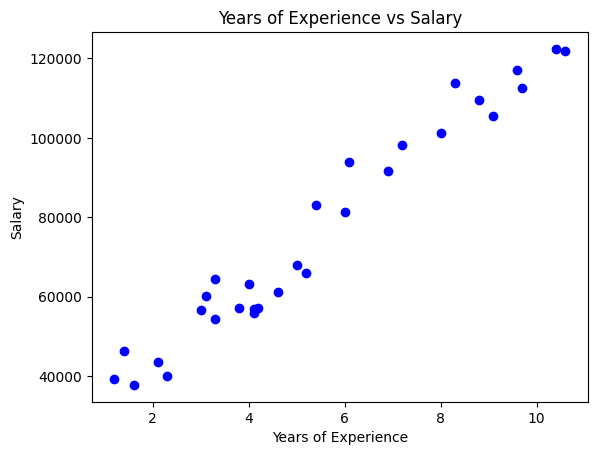

In [10]:
# Plotting the data
plt.scatter(df['YearsExperience'], df['Salary'], color='blue', marker='o')

# Adding titles and labels
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Show plot
plt.show()

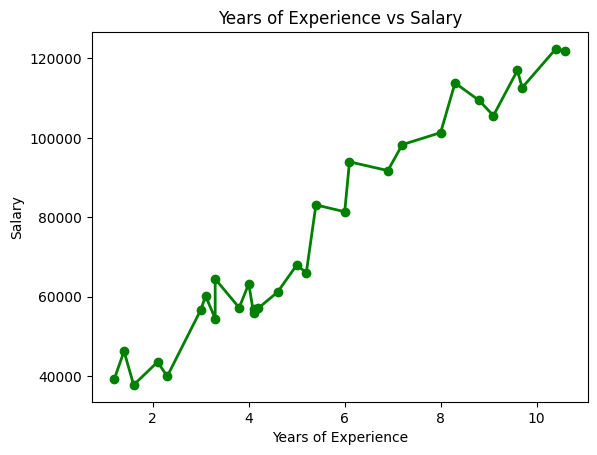

In [11]:
# Plotting the data
plt.plot(df['YearsExperience'], df['Salary'], color='green', marker='o', linestyle='-', linewidth=2)

# Adding titles and labels
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Show plot
plt.show()

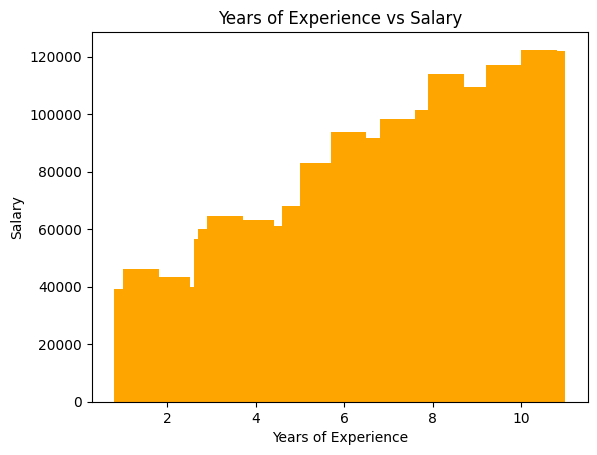

In [12]:
# Plotting the data
plt.bar(df['YearsExperience'], df['Salary'], color='orange')

# Adding titles and labels
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Show plot
plt.show()

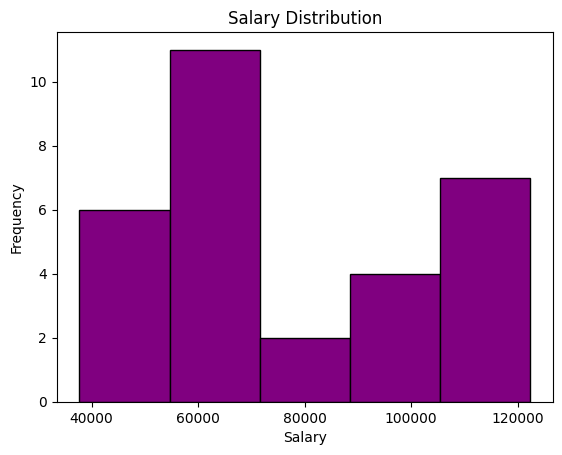

In [13]:
# Plotting the data
plt.hist(df['Salary'], bins=5, color='purple', edgecolor='black')

# Adding titles and labels
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')

# Show plot
plt.show()

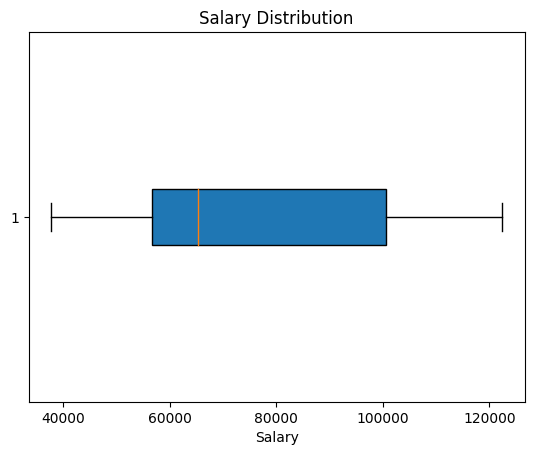

In [14]:
# Plotting the data
plt.boxplot(df['Salary'], vert=False, patch_artist=True)

# Adding titles and labels
plt.title('Salary Distribution')
plt.xlabel('Salary')

# Show plot
plt.show()

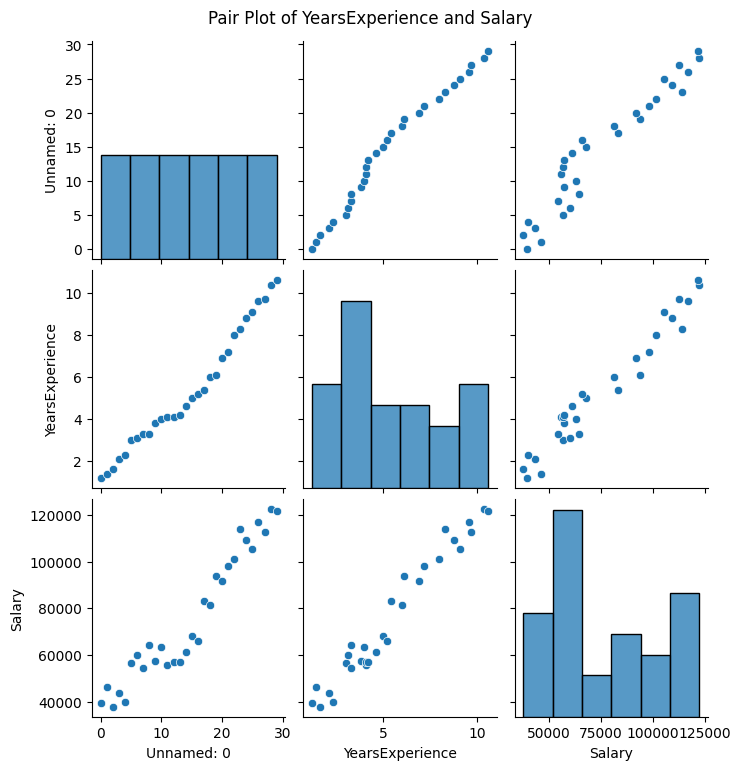

In [15]:
# Plotting the pair plot
sns.pairplot(df)

# Adding titles
plt.suptitle('Pair Plot of YearsExperience and Salary', y=1.02)

# Show plot
plt.show()

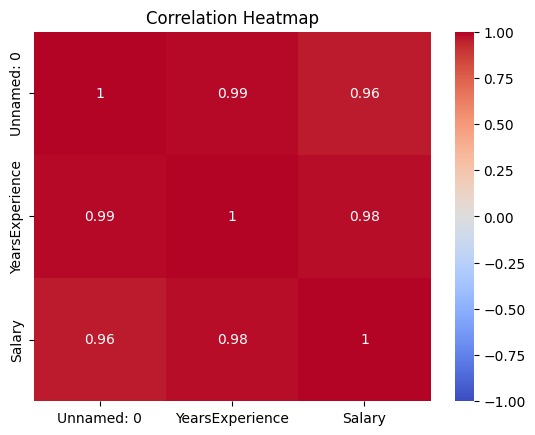

In [16]:
# Compute the correlation matrix
corr = df.corr()

# Plotting the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Adding titles
plt.title('Correlation Heatmap')

# Show plot
plt.show()

## 5- Spiliting the data

In [17]:
X = data[["YearsExperience"]]
y = data[["Salary"]]

In [18]:
# Splitting data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6- Building the model

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train,y_train)

LinearRegression()

In [21]:
# Predicting
y_pred = model.predict(X_test)
y_pred

array([[115791.21011287],
       [ 71499.27809463],
       [102597.86866063],
       [ 75268.80422384],
       [ 55478.79204548],
       [ 60190.69970699]])

## 7- Evaluating the model

In [22]:
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 6286.453830757745


In [23]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 49830096.855908394
